<a href="https://colab.research.google.com/github/ViacheslavCRBP/pythonProject/blob/Rec_sistem_course/HW_PyTorch_08_ViacheslavS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Фреймворк PyTorch для разработки искусственных нейронных сетей<b></h1>

###Урок 8. Generative Adversarial Networks</h2>

#### Практическое задание:</h3>  

Обучить генератор создавать точки, которые будут лежать на графике функции
 $$y = \frac{sin(x)}{x} - \frac{x}{10}$$
При выполнении данного задания структура GAN остается той же, но Вам нужно:
- Сгенерировать настоящие данные
- Изменить архитектуру дискриминатора и генератора
- Построить графики



## Подключаем модули и библиотеки

In [1]:
# import os
import numpy as np
import math
import torch
import torch.nn as nn
# import torchvision.transforms as transforms

from torch.utils.data import DataLoader, Dataset
# from torch.autograd import Variable

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# from IPython import display
from torchvision.utils import save_image, make_grid

Определим нужное устройство:

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Готовим данные

In [3]:
class Data(Dataset):
    def __init__(self, func, min, max, num):
        self.num = num
        self.x = np.random.rand(num) * (max - min) + min
        self.func = func

    def __getitem__(self, idx):
        point = self.x[idx]
        # return torch.FloatTensor([point, self.func(point)])
        return torch.Tensor([point, self.func(point)])

    def __len__(self):
        return self.num

## Запишем функцию

In [4]:
FUNC = lambda x: np.sin(x)/x - x/10

In [5]:
MIN = -15
MAX = 15
NUM = 10000

In [6]:
data = Data(FUNC, MIN, MAX, NUM)
data[0]

tensor([ 3.1234, -0.3065])

## Загружаем данные

In [7]:
data_loader = DataLoader(data, batch_size = 1000, shuffle=True)

## Создаем генератор
— это нейронная сеть, которая изучает базовое распределение данных.  
Во время обучения генератор постоянно пытается обыграть дискриминатор, улучшая качество подделок.

In [8]:
class Generator(nn.Module):
    def __init__(self, latent_dim, hidden_dim):
        super().__init__()

        self.linear_1 = nn.Linear(latent_dim, hidden_dim)
        self.linear_2 = nn.Linear(hidden_dim, 2)

    def forward(self, x):
        x = self.linear_1(x)
        x = torch.tanh(x)
        x = self.linear_2(x)
        return x

## Создаем дискриминатор
 — это нейронная сеть, обученная различать данные, созданные генератором, и реальные данные. Обычно он состоит из нескольких слоев плотно связанных нейронов и обучается с использованием обратного распространения.

 Дискриминатор обычно вынужден различать реальные данные и сгенерированные/синтетические данные, используя серию тестов, называемых «противоположные потери».

 Модель дискриминатора берет входные данные (реальные или сгенерированные) и предсказывает к какому из этих двух классов принадлежат эти данные.

После процесса обучения модель дискриминатора отбрасывается, поскольку нас уже интересует только генерация данных.

In [9]:
class Discriminator(nn.Module):
  def __init__(self, hidden_dim):
    super().__init__()

    self.linear_1 = nn.Linear(2, hidden_dim)
    self.linear_2 = nn.Linear(hidden_dim, hidden_dim // 2)
    self.linear_3 = nn.Linear(hidden_dim // 2, 1)

  def forward(self, x):

    x = self.linear_1(x)
    x = torch.relu(x)
    x = self.linear_2(x)
    x = torch.relu(x)
    x = self.linear_3(x)
    x = torch.sigmoid(x)
    return x

## Начинаем обучение

### Initialization
Инициализация весов — это процедура установки весов нейронной сети на небольшие случайные значения, которые определяют отправную точку для оптимизации (обучения или обучения) модели нейронной сети. Инициализация веса является важным фактором при разработке модели нейронной сети. Узлы в нейронных сетях состоят из параметров, называемых весами, которые используются для вычисления взвешенной суммы входных данных.

In [10]:
n_epochs = 1000  # количество эпох
lr = 0.01  # шаг обучения

b1 = 0.5  # гиперпараметр для оптимайзера Adam
b2 = 0.999  # гиперпараметр для оптимайзера Adam

latent_dim = 1  # Размерность случайного вектора, который подается на вход генератору
hidden_dim = 64

In [11]:
generator = Generator(latent_dim, hidden_dim).to(device)
discriminator = Discriminator(hidden_dim).to(device)

# Для каждой нейронки свой опитимизатор
optimizer_G = torch.optim.Adam(
    generator.parameters(),
    lr=lr,
    betas=(b1, b2)
)

optimizer_D = torch.optim.Adam(
    discriminator.parameters(),
    lr=lr,
    betas=(b1, b2)
)

# Но вот функция ошибки у нас будет одна общая
adversarial_loss = torch.nn.BCELoss()

In [12]:
d_loss_history = []
g_loss_history = []

### Learning process
Этот тип процесса машинного обучения (глубокое обучение) использует взаимосвязанные узлы или нейроны в слоистой структуре и создает адаптивную систему, с помощью которой сеть учится на своих ошибках и постоянно совершенствуется.

Обучая по очередно Генератор и Дискриминатор много и много раз, мы проводим своего рода соревнование между ними: кто лучше.

В итоге мы надеемся, что в конце получим Генератор, создающий точки, которые будут лежать на графике функции.

Epoch: 10; Discriminator_loss: 0.682; Generator_loss: 0.719


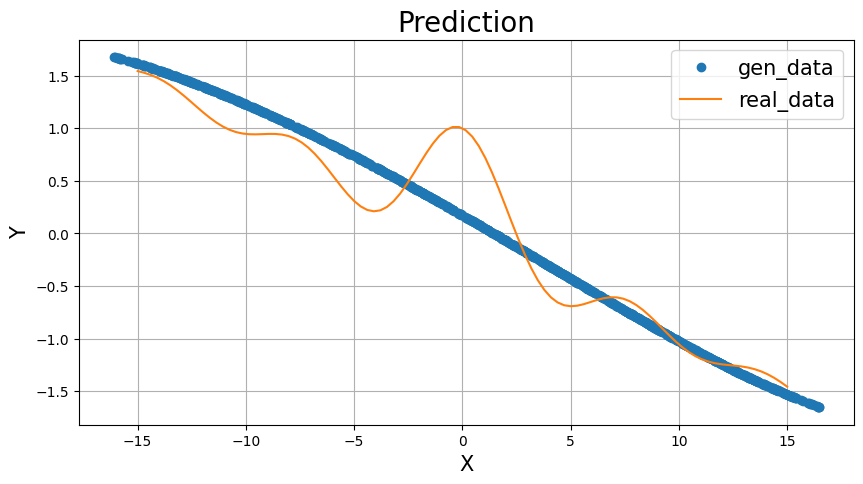

Epoch: 20; Discriminator_loss: 0.675; Generator_loss: 0.725


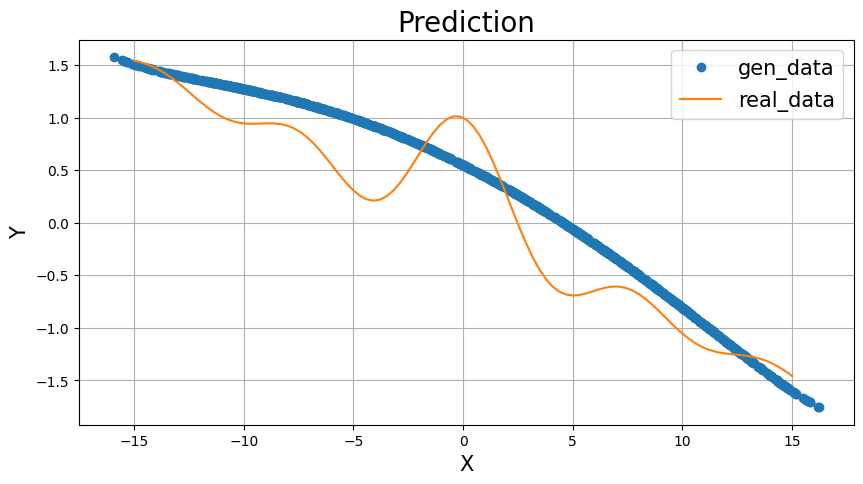

Epoch: 30; Discriminator_loss: 0.651; Generator_loss: 0.876


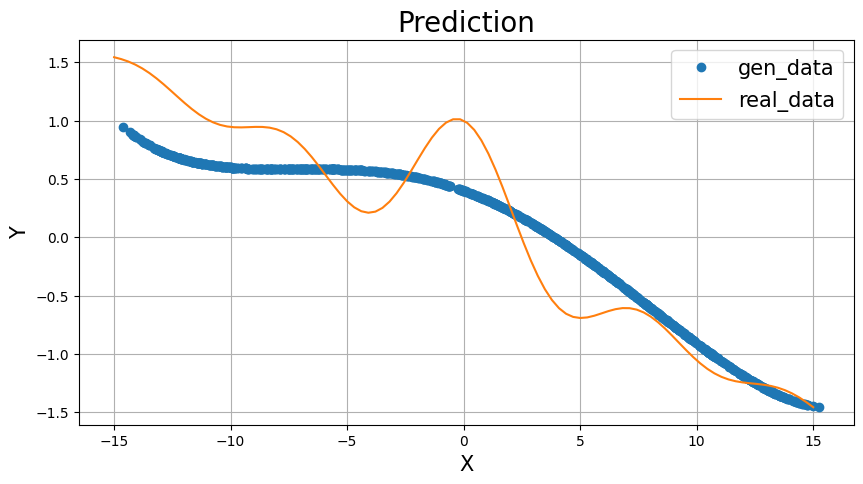

Epoch: 40; Discriminator_loss: 0.64; Generator_loss: 0.883


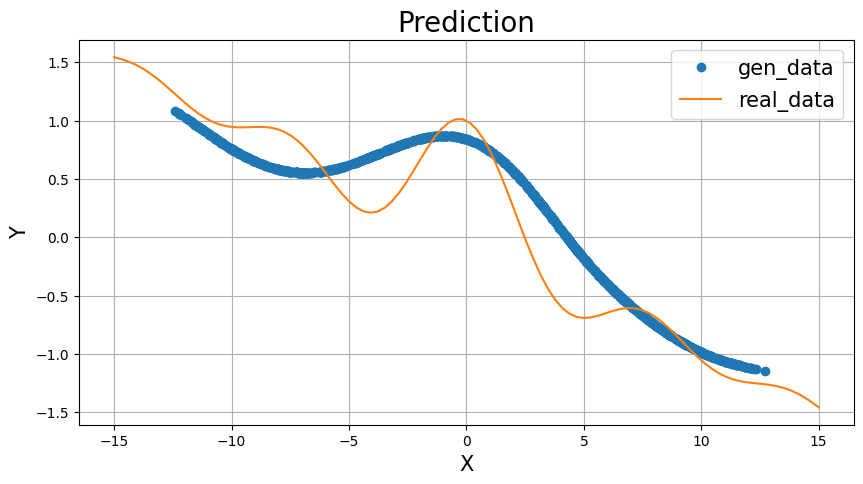

Epoch: 50; Discriminator_loss: 0.657; Generator_loss: 0.841


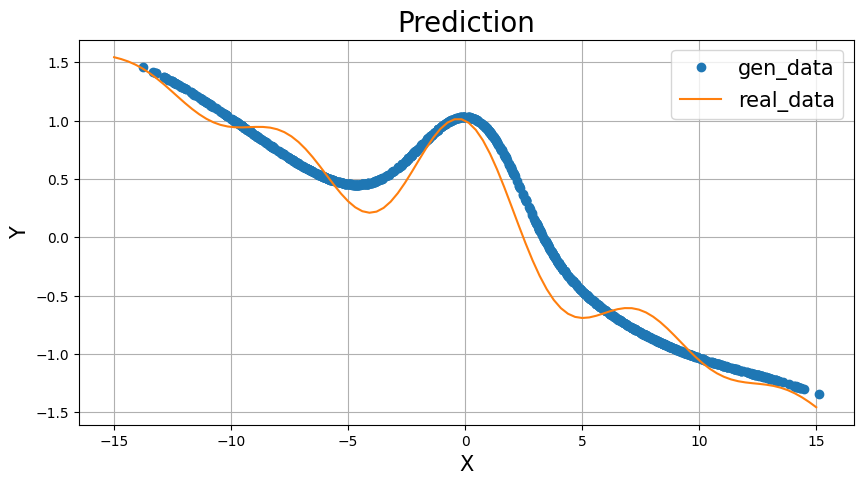

Epoch: 60; Discriminator_loss: 0.688; Generator_loss: 0.706


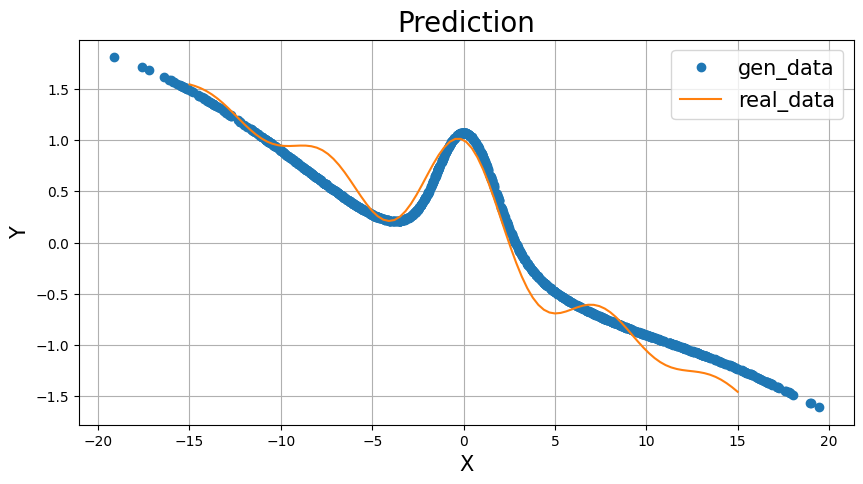

Epoch: 70; Discriminator_loss: 0.681; Generator_loss: 0.745


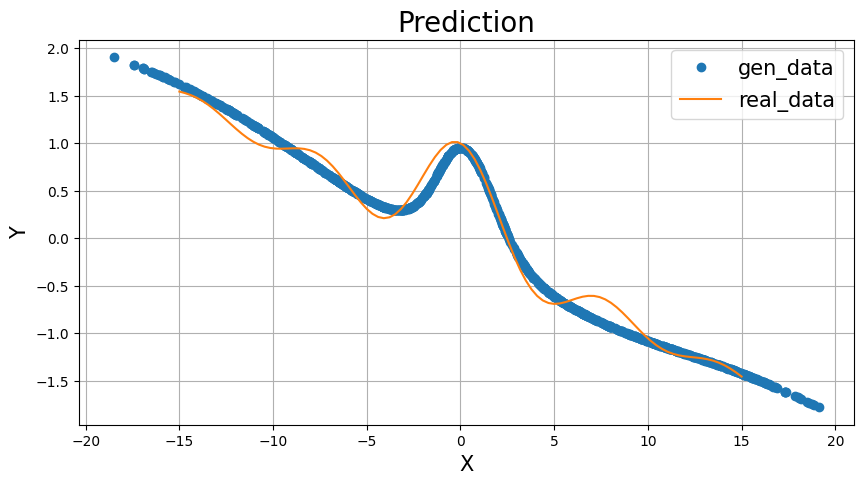

Epoch: 80; Discriminator_loss: 0.673; Generator_loss: 0.761


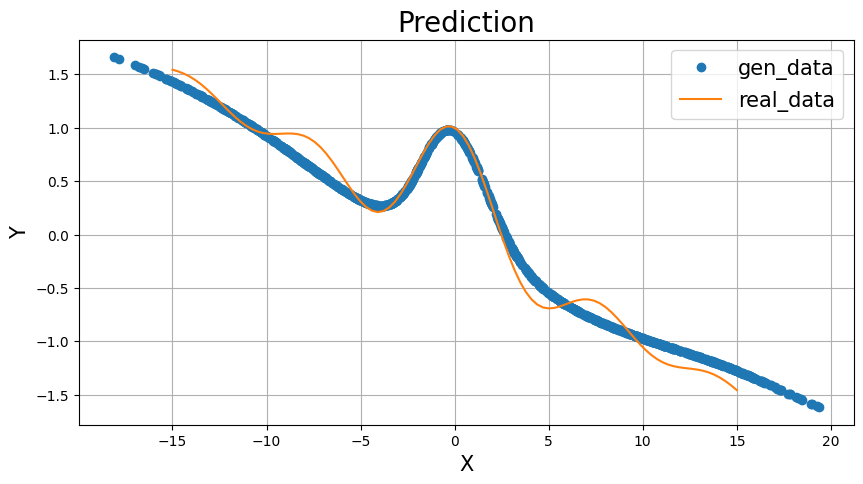

Epoch: 90; Discriminator_loss: 0.667; Generator_loss: 0.81


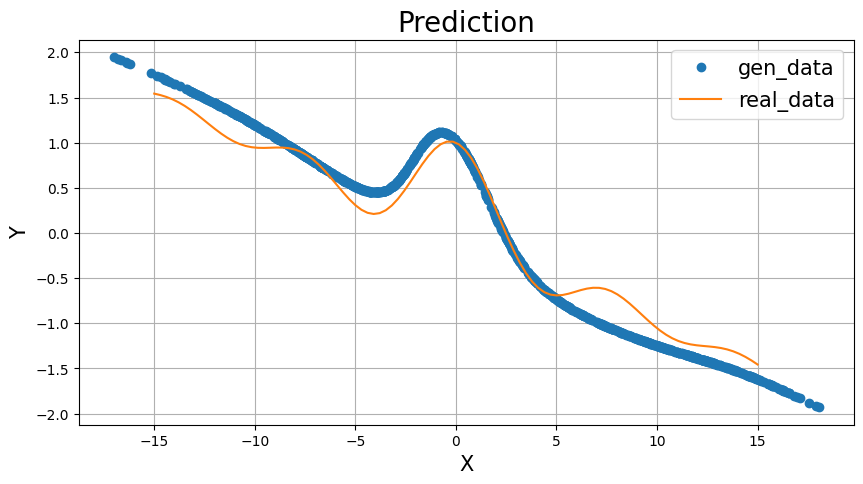

Epoch: 100; Discriminator_loss: 0.668; Generator_loss: 0.804


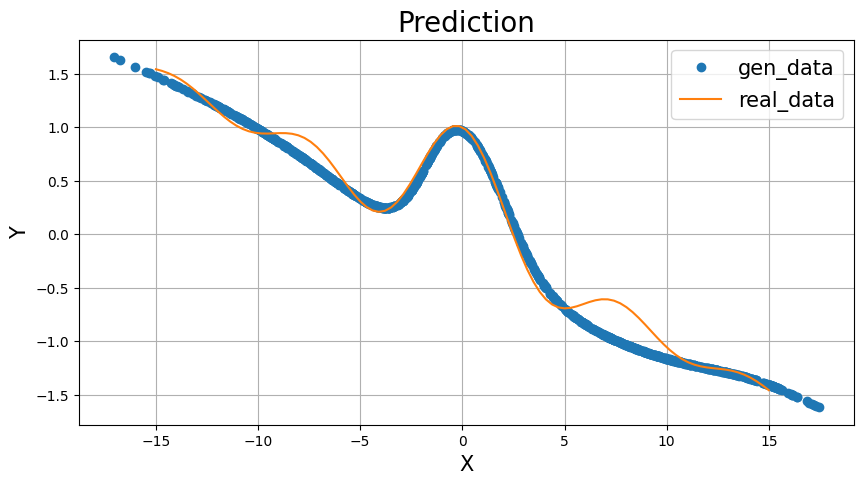

Epoch: 200; Discriminator_loss: 0.682; Generator_loss: 0.726


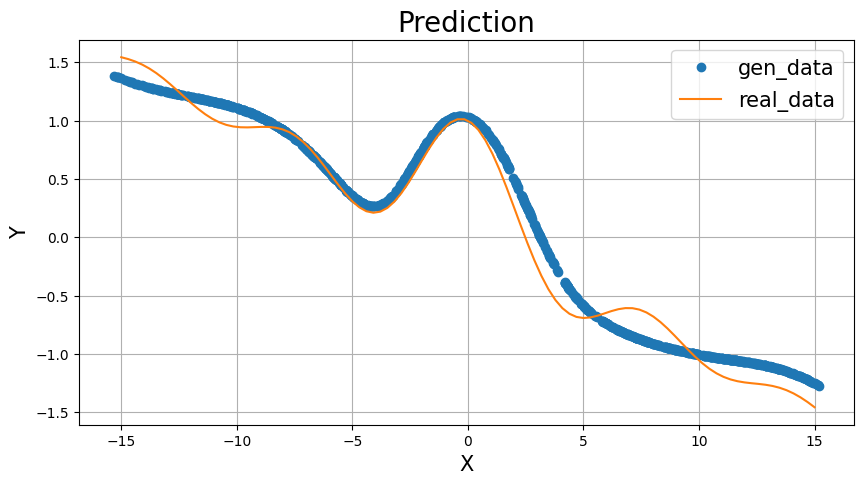

Epoch: 300; Discriminator_loss: 0.675; Generator_loss: 0.753


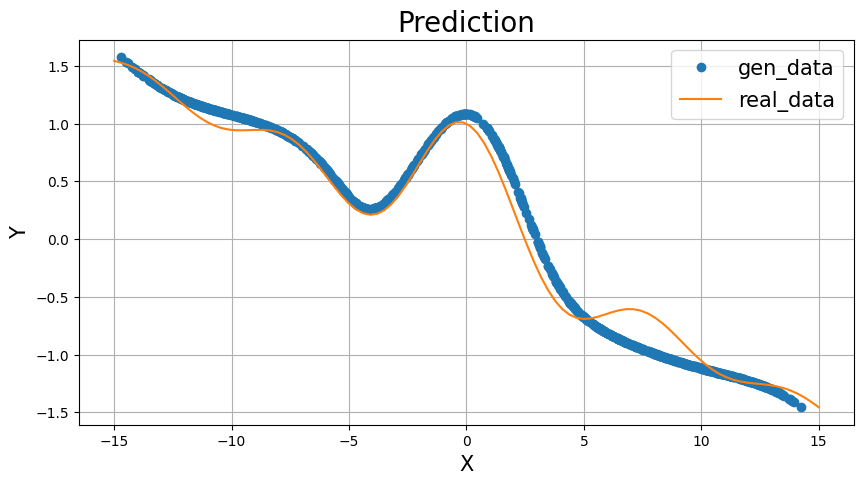

Epoch: 400; Discriminator_loss: 0.655; Generator_loss: 0.8


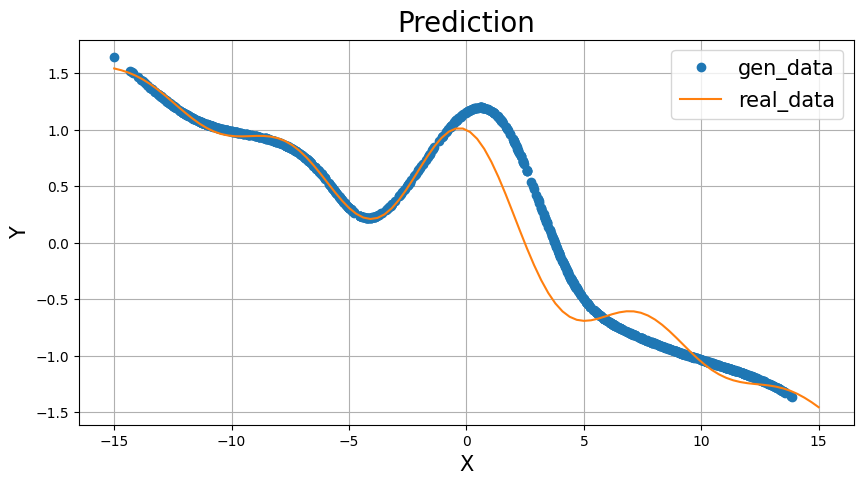

Epoch: 500; Discriminator_loss: 0.671; Generator_loss: 0.818


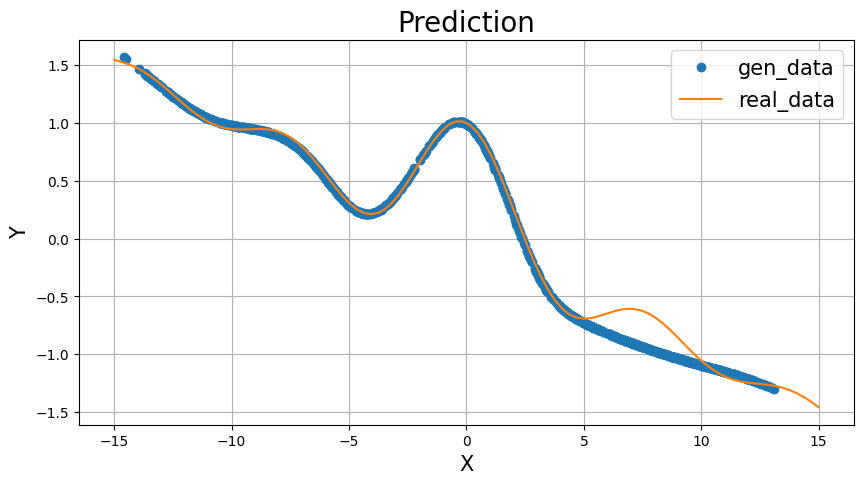

Epoch: 600; Discriminator_loss: 0.665; Generator_loss: 0.815


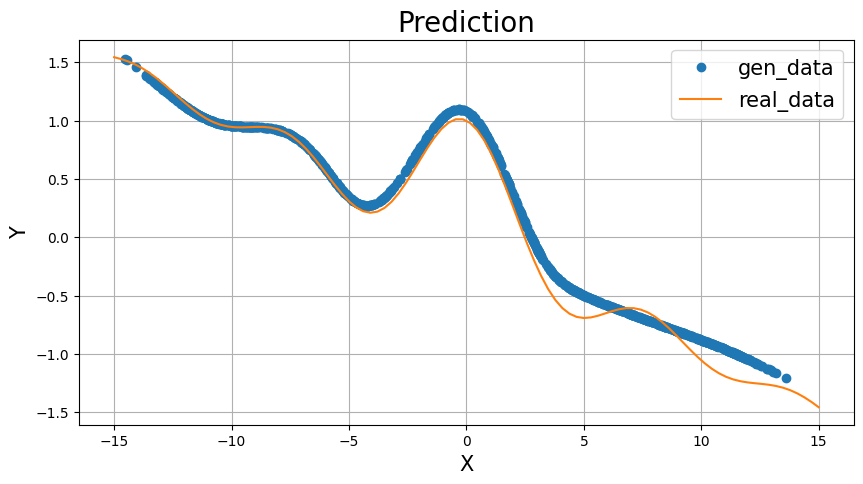

Epoch: 700; Discriminator_loss: 0.656; Generator_loss: 0.878


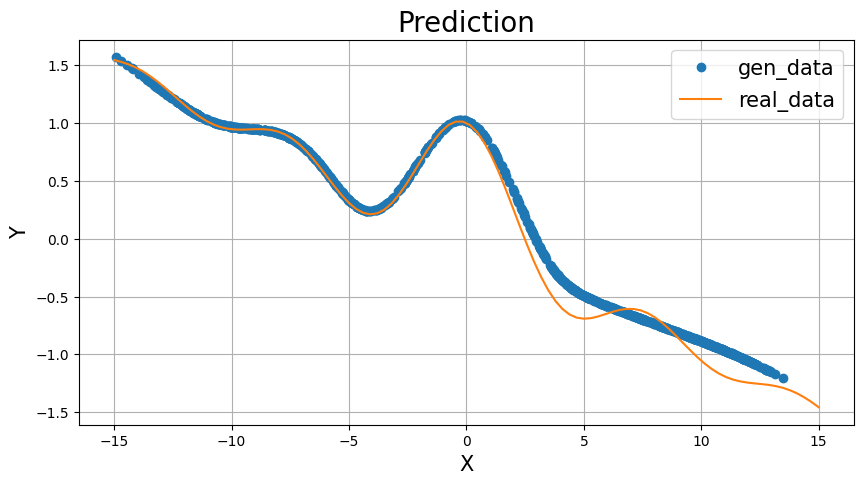

Epoch: 800; Discriminator_loss: 0.645; Generator_loss: 0.883


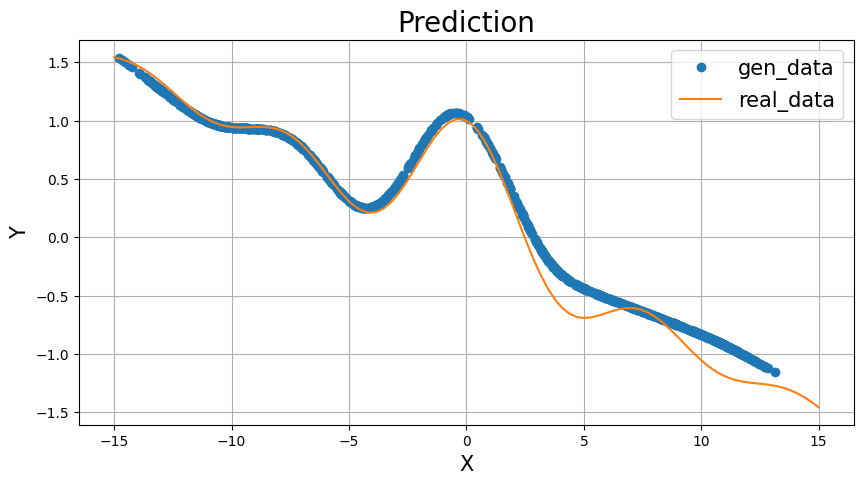

Epoch: 900; Discriminator_loss: 0.638; Generator_loss: 0.939


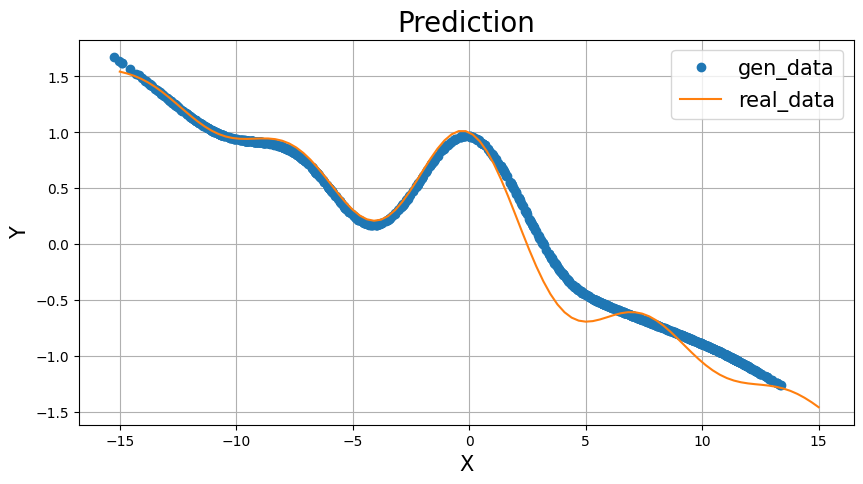

Epoch: 1000; Discriminator_loss: 0.674; Generator_loss: 0.756


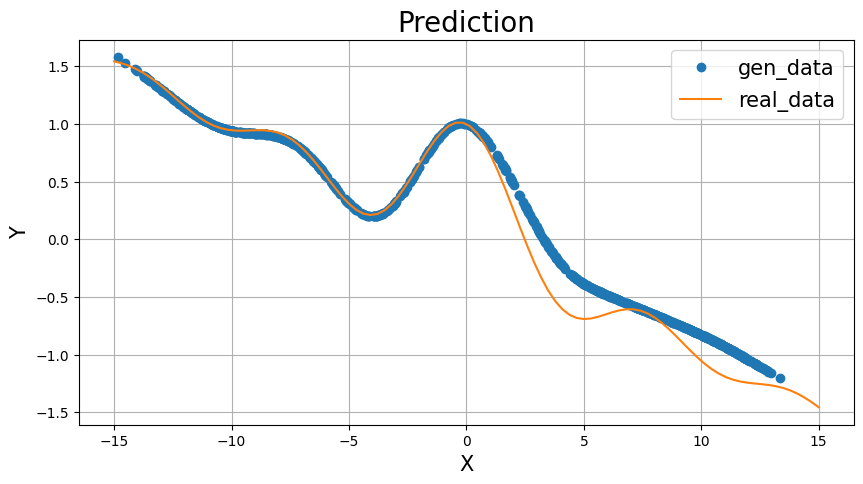

In [13]:
for epoch in range(n_epochs):

    d_loss_mean = 0.0
    g_loss_mean = 0.0

    for data in data_loader:
        batch_size = len(data)

##################### Лейблы для данных: 1 - настоящие, 0 - сгенерированные ########
        valid = torch.Tensor(batch_size, 1).fill_(1.0).to(device)
        fake = torch.Tensor(batch_size, 1).fill_(0.0).to(device)

        # real_data = data.type(torch.FloatTensor).to(device)
        real_data = data.type(torch.Tensor).to(device)

        # Генерация шума
        z = torch.FloatTensor(np.random.normal(0, 1, (batch_size, latent_dim))).to(device)

        # Генерируем данные Генератором на основе шума
        gen_data = generator(z)

######################  Тренировка дискриминатора    ##########################

        # Получаем предсказания дискриминатора на основе реальных данных
        real_pred = discriminator(real_data)

        # Тут сравниваем предсказанные значения Дискриминатора(на основе настоящих данных) с настоящими
        d_real_loss = adversarial_loss(real_pred, valid)

        # Подаем сгенерированые данные на Дискриминатор
        fake_pred = discriminator(gen_data)

        # расчитываем ошибку предсказанного с фейковыми лейблами
        d_fake_loss = adversarial_loss(fake_pred, fake)

        # И усредняем два лосса в один
        d_loss = (d_real_loss + d_fake_loss) / 2

        optimizer_D.zero_grad()
        d_loss.backward()
        optimizer_D.step()

######################  Тренировка генератора    ##########################

        # генерация шума
        # z = torch.FloatTensor(np.random.normal(0, 1, (batch_size, latent_dim))).to(device)
        z = torch.Tensor(np.random.normal(0, 1, (batch_size, latent_dim))).to(device)

        # Генерируем данные Генератором на основе шума
        gen_data = generator(z)

        # Подаем сгенерированые данные на Дискриминатор
        fake_pred = discriminator(gen_data)

        # Тут сравниваем предсказанные значения Дискриминатора (на основе сгенерировнных данных) с настоящими
        g_loss = adversarial_loss(fake_pred, valid)

        # Делаем шаг обучения нашего Генератора
        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

        d_loss_mean += d_loss.item()
        g_loss_mean += g_loss.item()

######## Отображение процесса обучения и вывод функций потерь ############
    if ((epoch + 1) % 10 == 0 and (epoch + 1) < 100)  or ((epoch + 1) % 100) == 0:
        print(f'Epoch: {epoch + 1}; '\
                f'Discriminator_loss: {round(d_loss_mean / len(data_loader), 3)}; '\
                f'Generator_loss: {round(g_loss_mean / len(data_loader), 3)}')

        plt.figure(figsize = (10,5))
        plt.title('Prediction', fontsize = 20)
        plt.grid(True)
        plt.ylabel('Y', fontsize = 15)
        plt.xlabel('X', fontsize = 15)

        gen_data = gen_data.cpu().detach().numpy()
        plt.plot(gen_data[:,0], gen_data[:,1], 'o', label='gen_data')

        plt.plot(np.linspace(MIN, MAX, 100), FUNC(np.linspace(MIN, MAX, 100)), label='real_data')

        plt.legend(fontsize = 15)
        plt.show()

    d_loss_history.append(d_loss_mean / len(data_loader))
    g_loss_history.append(g_loss_mean / len(data_loader))

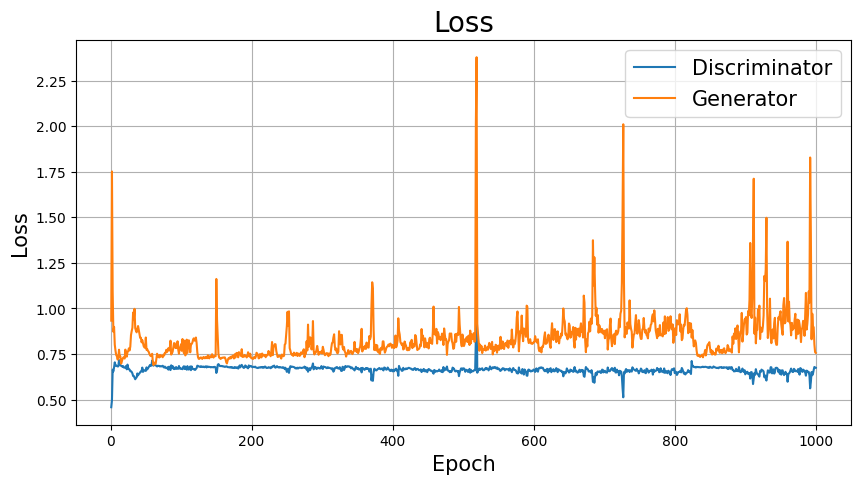

In [14]:
plt.figure(figsize = (10,5))

plt.title('Loss', fontsize = 20)
plt.grid(True)
plt.ylabel('Loss', fontsize = 15)
plt.xlabel('Epoch', fontsize = 15)
plt.plot(range(1, n_epochs+1), d_loss_history, label='Discriminator')
plt.plot(range(1, n_epochs+1), g_loss_history, label='Generator')
plt.legend(fontsize = 15);

## Вывод

Были сгенерированы синтетические данные, как точки (x,y)

Затем построен простейший Discriminator: 3 слойная линейная нейронная сеть с функциями активации relu и выходной функцией sigmoid, чтобы получить вероятностную оценку от 0 до 1 для точек.

Затем был построен Generator: 2 слойная линейная нейронная сеть с функцией активации tanh, так как эта функция хорошо описывает sin(x), который присутствует в реальных данных, но tanh хуже чем relu передаёт градиент. Поэтому в нейронной сети всего 2 слоя. На выходе не стоит функция активации, так как в теории точка (x,y) имеет область определения от -inf до +inf для каждой координаты.

Латентный вектор имеет размероность один, так как чтобы построить точки (x,y), где y=f(x), достаточно знать только x, а значит можно взять размерность один для латентного вектора z, ведь этот генератор может отобразить координату из латентного пространства на ось Х, а дальше найти y=f(x), только делая это параллельно, а не последовательно. Таким образом теоретически понятно, что для латентного вектора достаточно размерности один. Так же можно заметить, что при такой размерности латентного вектора распределение точек сразу принимает форму какой-то кривой, а не области, что уже является правильным, а значит брать большую размерность для латентного вектора неэффективно.

Как можно увидеть на графиках, на первых 100 эпохах идёт активное обучение генератора, дальше можно заметить, что генератору не удаётся построить только краевые точки. Это связано с тем, что при обучении генератора мы подаём ему на вход нормальное распределение, а значит генератор гораздо чаще строит точки в середине и гораздо реже краевые точки, соответственно реже на них ошибается и реже настраивает для них веса, зато он почти не ошибается для точек в центре.

### Предсказания при отрицательных значениях Х оказались более точными.

В целом можно сказать, что у нас получилось научить генератор создавать точки из заданной функции.